In [2]:
%matplotlib inline
import os
import sys
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rc
import pdb
import h5py
import subprocess
import datetime

import platform
if platform.system() == 'Darwin':
    # On a Mac: usetex ok
    mpl.rc('font',**{'family':'serif','serif':['Computer Modern']})
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=True)
elif platform.node().startswith("D"):
    # On hyak: usetex not ok, must change backend to 'agg'
    mpl.rc('font',**{'family':'serif','serif':['Computer Modern']})
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=False)
    plt.switch_backend('agg')
else:
    # On astro machine or other linux: usetex not ok
    plt.switch_backend('agg')
    mpl.rc('font', family='Times New Roman')
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=False)

In [4]:
import smart
import coronagraph as cg
import pandas as pd

In [6]:
from matplotlib import rcParams
rcParams["savefig.dpi"] = 200
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20
rcParams["figure.figsize"] = [8, 5]
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans Serif"]
rcParams["text.usetex"] = True

In [8]:
lamhr, Ahr, fstar = cg.get_earth_reflect_spectrum()

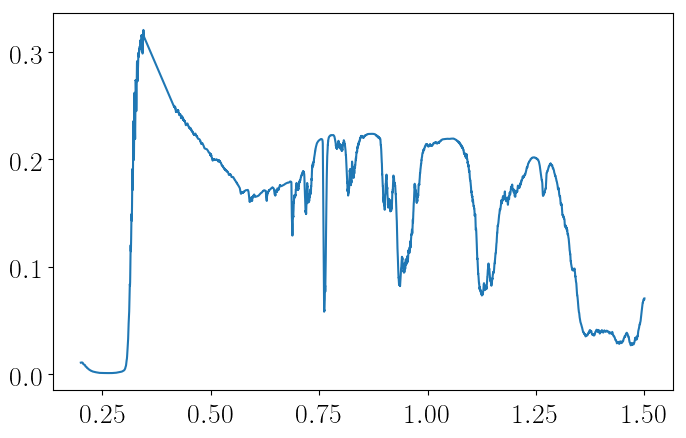

In [10]:
lammin = 0.2
lammax = 1.5
m = (lamhr > lammin) & (lamhr < lammax)

plt.plot(lamhr[m], Ahr[m])

In [23]:
telescope = cg.Telescope(lammin = 0.4, 
                         lammax = 1.4, 
                         R = 140, 
                         Tput = 0.1, 
                         D = 16.)

planet = cg.Planet(d = 5.0, 
                   Rp = 1.0, 
                   a = 1.0, 
                   alpha = 90.0)

star = cg.Star(Teff = 5780., 
               Rs = 1.0)

In [24]:
cn = cg.CoronagraphNoise(telescope = telescope, 
                         planet = planet, 
                         star = star, 
                         THERMAL=True)

In [25]:
cn.run_count_rates(Ahr, lamhr, fstar)

In [26]:
cn.make_fake_data(texp = 10)

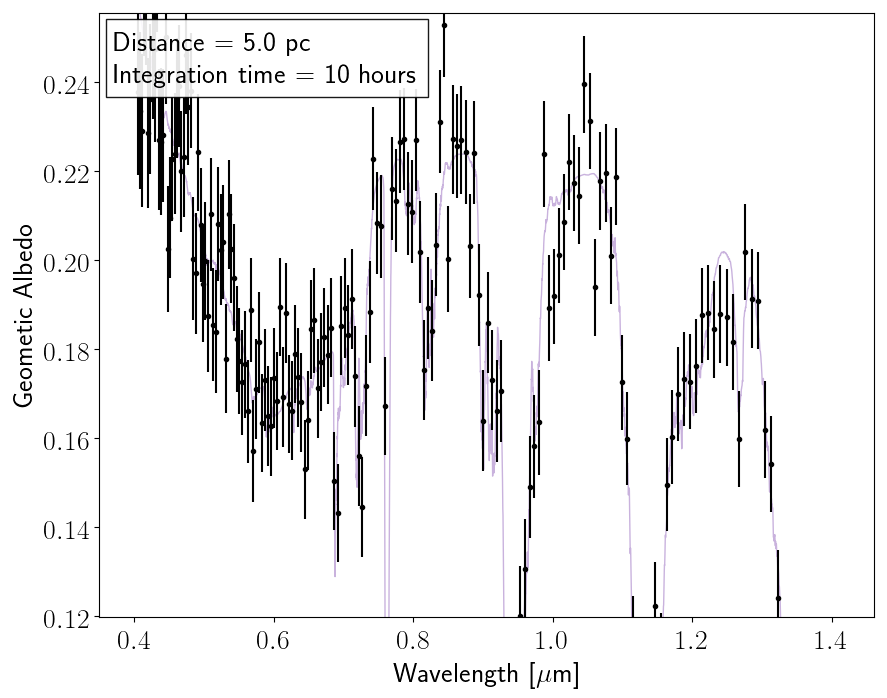

In [27]:
fig, ax = cn.plot_spectrum()

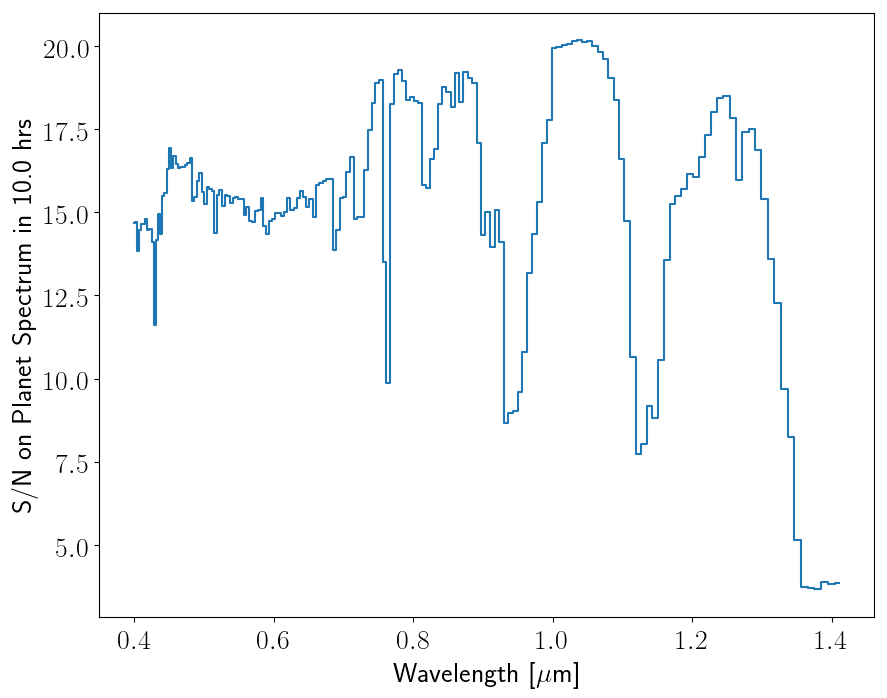

In [28]:
fig, ax = cn.plot_SNR()

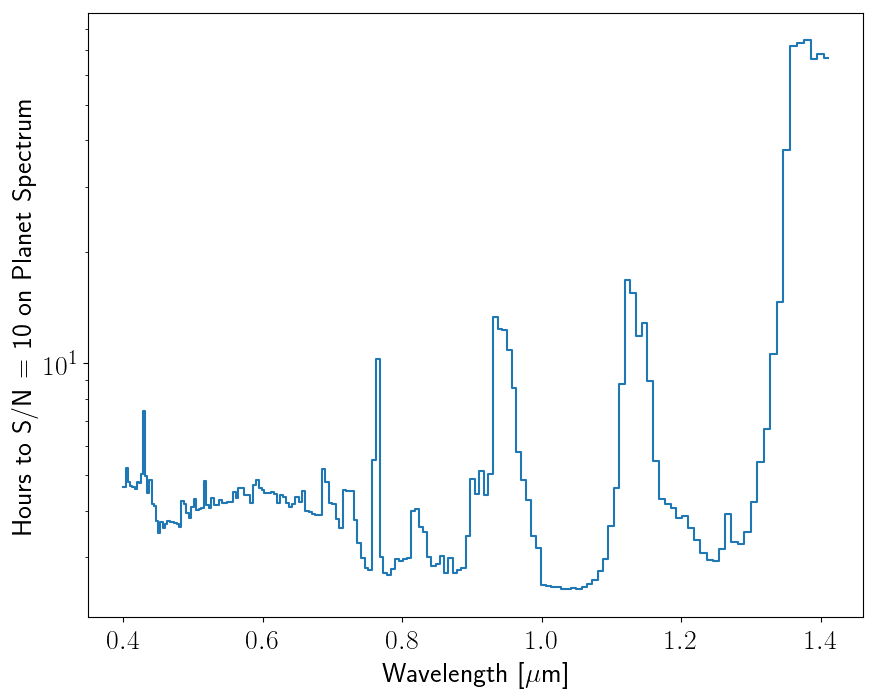

In [29]:
fig, ax = cn.plot_time_to_wantsnr()

2.06 hours to SNR = 10.00
SNR = 6.97 in a 1.00 hour exposure


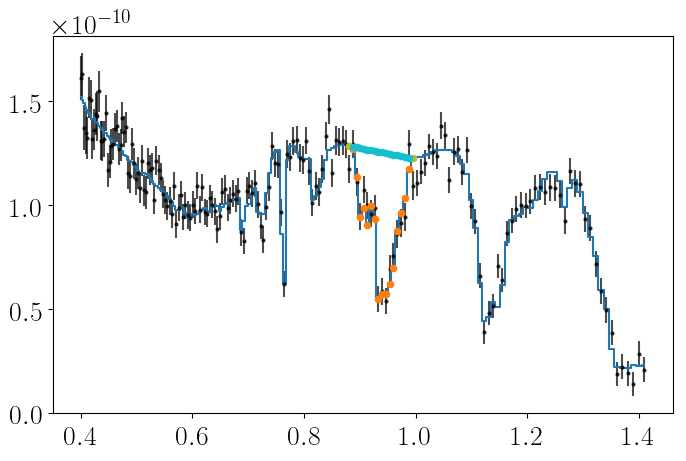

In [83]:
wantSNR = 10.0
wantetime = 1.0

icont = np.array([111, 128])
iband = np.arange(icont[0]+1, icont[1])

plt.plot(cn.lam, cn.Cratio, ls = "steps-mid")
plt.errorbar(cn.lam, cn.Cobs, yerr=cn.Csig, fmt = "ok", ms = 2.0, alpha = 0.7)


for i in icont:
    plt.scatter(cn.lam[i], cn.Cratio[i], s = 20.0, c = "C8", marker = "o", zorder = 100)
for i in iband:
    plt.scatter(cn.lam[i], cn.Cratio[i], s = 20.0, c = "C1", marker = "o", zorder = 100)
    
ccont = cg.observe.interp_cont_over_band(cn.lam, cn.cp, icont, iband)
ccrat = cg.observe.interp_cont_over_band(cn.lam, cn.Cratio, icont, iband)

for i, ic in enumerate(iband):
    plt.scatter(cn.lam[ic], ccrat[i], s = 20.0, c = "C9", marker = "o", zorder = 100)

etime = cg.observe.exptime_band(cn.cp, ccont, cn.cb, iband, SNR=wantSNR)
print("%.2f hours to SNR = %.2f" %(etime, wantSNR))

eSNR = cg.observe.SNR_band(cn.cp, ccont, cn.cb, iband, itime=wantetime)
print("SNR = %.2f in a %.2f hour exposure" %(eSNR, wantetime))

In [78]:
etime

2.0557315172272785